In [1]:
%load_ext autoreload
%autoreload 2
!ls

700_spb.txt  db_stocks.py	mean_volumns.csv  tinkoff_book.ipynb
MCD.csv      downloade_day_interval.py	stock_tracker	  tinkoff_downloader.py
__pycache__  downloader.py		stock_tracking
candle.py    main.py			stocktracker


In [2]:
import sys
sys.path.append('Projects/Stock/Tinkoff/')
from openapi_client import openapi
from tinkoff_downloader import Downloader
import os
import numpy as np
import time
from datetime import datetime, timedelta, date

In [3]:
token = "t.wlnxazSuK6W--U6od2e6k778AW3nfY7MPm-1h93rzYXl6JIVPTnODfaeaJz1EjhfWl6XnJn2MCmIlqJPeeF6tg"
client = openapi.sandbox_api_client(token)

stocks = client.market.market_stocks_get()
instuments = stocks.payload.instruments

figi = instuments[27].figi
name = instuments[27].name
print(figi, name)

BBG000BNSZP1 Mc'DONALDS


In [17]:
start = '2020-01-30T23:00:00.00+00:00'
end   = '2020-12-31T23:00:00.00+00:00'

start = datetime.now() - timedelta(days=15)
end   = datetime.now() - timedelta(days=1)
interval = 'day'
start = start.isoformat() + '+00:00'
end   = end.isoformat()   + '+00:00'

ans = client.market.market_candles_get(figi, start, end, interval, _request_timeout = 15)
print(len(ans.payload.candles))

9


In [23]:
import csv
downloader = Downloader()
figi = instuments[27].figi
ticker = instuments[27].ticker

candles = downloader._download_day_interval(figi,"01.01.2008","01.01.2021")
print(len(candles))
file = open(ticker+'.csv', 'w', newline='\n')
writer = csv.writer(file, delimiter=';')
writer.writerow(('time', 'o', 'c', 'h', 'l','v'))

for c in candles:
    d = {'time': c['time'], 'o': c['o'], 'c': c['c'], 'h': c['h'], 'l': c['l'], 'v': c['v']}
    writer.writerow(d.values())
file.close()

2008-01-01T00:00:00+00:00 2008-12-31T23:59:59+00:00
2009-01-01T00:00:00+00:00 2009-12-31T23:59:59+00:00
2010-01-01T00:00:00+00:00 2010-12-31T23:59:59+00:00
2011-01-01T00:00:00+00:00 2011-12-31T23:59:59+00:00
2012-01-01T00:00:00+00:00 2012-12-31T23:59:59+00:00
2013-01-01T00:00:00+00:00 2013-12-31T23:59:59+00:00
2014-01-01T00:00:00+00:00 2014-12-31T23:59:59+00:00
2015-01-01T00:00:00+00:00 2015-12-31T23:59:59+00:00
2016-01-01T00:00:00+00:00 2016-12-31T23:59:59+00:00
2017-01-01T00:00:00+00:00 2017-12-31T23:59:59+00:00
2018-01-01T00:00:00+00:00 2018-12-31T23:59:59+00:00
2019-01-01T00:00:00+00:00 2019-12-31T23:59:59+00:00
2020-01-01T00:00:00+00:00 2020-12-31T23:59:59+00:00
3275


In [51]:
2770/263
stocks = client.market.market_stocks_get()

In [52]:
print(len(stocks.payload.instruments))
stocks.payload.instruments[1]

1567


{'currency': 'USD',
 'figi': 'BBG002293PJ4',
 'isin': 'US74967X1037',
 'lot': 1,
 'min_price_increment': 0.01,
 'name': 'RH',
 'ticker': 'RH',
 'type': 'Stock'}

In [64]:
s_time = time.time()
figi = instuments[232].figi
stocks = client.market.market_stocks_get()
time.time() - s_time

4.018055200576782

In [110]:
arr_times = []
for i in range(5):
    s_time = time.time()
    figi = instuments[i*10].figi
    downloader.get_candles_from_to(figi,"01.01.2020","01.01.2021","1min")
    dt = time.time() - s_time
    arr_times.append(dt)

In [111]:
t = np.array(arr_times)
print(t.mean(), t.std())

84.03074350357056 22.603514065110264


In [112]:
t

array([ 82.94297385,  49.416085  , 115.18650579,  99.98287034,
        72.62528253])

In [94]:
file = open('Projects/Stock/Tinkoff/mean_volumns.csv','w')
csv_writer = csv.writer(file, delimiter=';')
for inst in instuments:
    figi = inst.figi
    ticker = inst.ticker
    candles = downloader._download_day_interval(figi,"01.01.2020","01.01.2021")
    volumns = [c['v'] for c in candles]
    mean = np.mean(volumns)
    csv_writer.writerow((ticker, mean))
file.close()

/home/office/kirilman/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/office/kirilman/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [108]:
rus = []
for inst in instuments:
    if inst.currency == 'RUB':
        print(inst.ticker,';',inst.name,';')
        rus.append(inst.name)
print(len(rus))

BANE ; Башнефть ;
OKEY ; O'Key Group SA ;
TRMK ; Трубная Металлургическая Компания ;
MOEX ; Московская Биржа ;
BANEP ; Башнефть - привилегированные акции ;
RUAL ; РУСАЛ ;
TTLK ; Таттелеком ;
MRKU ; МРСК Урала ;
GMKN ; Норильский никель ;
MRKZ ; МРСК Северо-Запада ;
TGKB ; ТГК-2 ;
KZOS ; ПАО «КАЗАНЬОРГСИНТЕЗ» ;
MSRS ; МОЭСК ;
QIWI ; QIWI ;
IRKT ; Корпорация ИРКУТ ;
ISKJ ; ИСКЧ ;
FLOT ; Совкомфлот ;
OZON ; Ozon Holdings PLC ;
UPRO ; Юнипро ;
MTLRP ; Мечел - Привилегированные акции ;
KZOSP ; ПАО «КАЗАНЬОРГСИНТЕЗ» - акции привилегированные ;
LSNG ; Ленэнерго ;
HYDR ; РусГидро ;
RTKMP ; Ростелеком - Привилегированные акции ;
YNDX ; Yandex ;
AFKS ; АФК Система ;
VRSB ; ТНС энерго Воронеж ;
VTBR ; Банк ВТБ ;
SELGP ; Селигдар - Акции привилегированные ;
ROSN ; Роснефть ;
NKNC ; Нижнекамскнефтехим ;
ENPG ; En+ Group ;
CHMK ; ЧМК ;
FEES ; ФСК ЕЭС ;
GAZP ; Газпром ;
VZRZP ; Банк Возрождение - акции привилегированные ;
KRKNP ; Саратовский НПЗ - акции привилегированные ;
RASP ; Распадская ;
APTK ; 

In [114]:
end

'2021-01-08T08:05:21.727205+00:00'

In [199]:
arr_times = []
for i in range(10000):
    d = np.random.randint(10,450)
    figi = instuments[d].figi
    current_start_string ='2020-05-22T00:00:00+00:00'
    current_end_string =  '2020-05-22T23:00:00+00:00'
    s_start = time.time()
    candles = client.market.market_candles_get(figi, current_start_string,
                                           current_end_string,
                                           '1min',
                                           _request_timeout=15)
    dt = time.time() - s_start
    arr_times.append(dt)
    # print(len(candles.payload.candles))

In [202]:
print(np.mean(arr_times), np.std(arr_times))

0.274620139503479 0.17565381630983845


In [203]:
mean = np.mean(arr_times)
60/mean

218.48361197573382

In [204]:
print(np.sum(arr_times),np.sum(arr_times)/1000)

2746.20139503479 2.74620139503479


In [208]:
import http.client as httplib

def have_internet():
    conn = httplib.HTTPConnection("www.google.com", timeout=5)
    try:
        conn.request("HEAD", "/")
        conn.close()
        return True
    except:
        conn.close()
have_internet()

True

In [2]:
from db_stocks import InfluxBase
import pandas as pd
import matplotlib.pyplot as plt

dbase = InfluxBase('localhost', '8086', 'kirilman', '606613', 'tinkoff')
ticker = "AMD"
# frame = pd.read_csv('../../../Datasets/SPB/day/{}.csv'.format(ticker), sep=';')
# candles = []
# for row in frame.iterrows():
#     row = row[1]
#     d = {"open" : float(row["o"]),
#          "close": float(row["c"]),
#          "low"  : float(row["l"]),
#          "high" : float(row["h"]),
#          "volume": float(row["v"]),
#          "time" : row["time"],
#          "interval" : "day"}
#     candles.append(d)
# print(len(candles), candles[0])

In [22]:
# res = dbase.client.query("SELECT last(*) FROM stocks WHERE interval = 'day'")
res = dbase.client.query("select * from stocks limit 1")

In [2]:
dbase.client.close()

NameError: name 'dbase' is not defined

In [522]:
result = res.get_points(tags={'interval':'day', 'ticker':'F'})
result = list(result)
print(len(result), result[-1])
arr = np.array([h['open'] for h in result])
plt.plot(arr)

AttributeError: 'list' object has no attribute 'get_points'

In [523]:
res = dbase.get_candle_from_to('F','day','2005-01-01','2021-01-01')
frame = pd.DataFrame(res)
cash=0
c_pred = 0.001

u = []
for row in frame.iterrows():
    _open = row[1]['open']
    close = row[1]['close'] 
    
    delta = close/c_pred - 1
    c_pred = close
    u.append(delta)


(-0.15, 0.15)

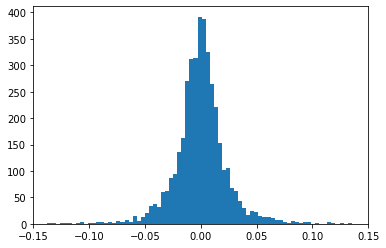

In [524]:
deltas = np.array(u[1:] )

plt.hist(deltas,150);
a = plt.gca()
a.set_xlim(-0.15,0.15)